# 051 A Phenology model  : Answers to exercises

#### Exercise 1

* From the code above, develop a function `solver` in a file `work/lut_solver.py` that takes the following inputs:
    
    * lai, weight : datasets of shape (Nt,Nx,Ny) for observations and reliability
    * 2D parameter grids for model parameters p3 and p5 with shape (Np0,Np1)
    * function slope parameters p2 and p4 for the double sigmoid: float
    * function vertical min and extent parameters p0 and p1 of shape (Nx,Ny)
    
  and solves for the optimal weighted fit between LAI and modelled LAI using the parameters pi
  It should return:
  
    *  p : list of 6 parameter arrays solved for, so 6 of shape (Nx,Ny)
    * RMSE : the RMSE 
* Produce a plot of all 6 model parameters    
* The code could be made more efficient by not processing invalid pixels. Develop and use a mask of valid pixels to implement this.

Hint: You might usefully define some utility functions such as `get_lai` and `get_p0p1` to allow you to easily load the datasets you need top run. You might base these around `geog0111.get_lai_data` and `geog0111.regularise`.

In [26]:
# ANSWER
from geog0111.get_lai_data import get_lai_data
from geog0111.regularise import regularise
from geog0111.lut_solver import lut_solver,get_lai,get_p0p1
import numpy as np

lai,weight,doy = get_lai()
sp0min,sp0max,sp0step = 100,250,10
sp1min,sp1max,sp1step = 100,300,10
sp0,sp1 = np.mgrid[sp0min:sp0max+sp0step:sp0step,\
                 sp1min:sp1max+sp1step:sp1step]
width,centre = sp0,sp1
sp3 = centre - width/2.
sp5 = centre + width/2.
p2 = p4 = 0.07
p0,p1 = get_p0p1(lai,weight)

rmse,p = lut_solver(doy,lai,weight,p0,p1,p2,sp3,p4,sp5)

In [27]:
# The code could be made more efficient 
# by not processing invalid pixels. 
# Develop and use a mask of valid pixels to implement this.
msg = '''Just apply a mask to the ravelled image data'''
print(msg)

Just apply a mask to the ravelled image data


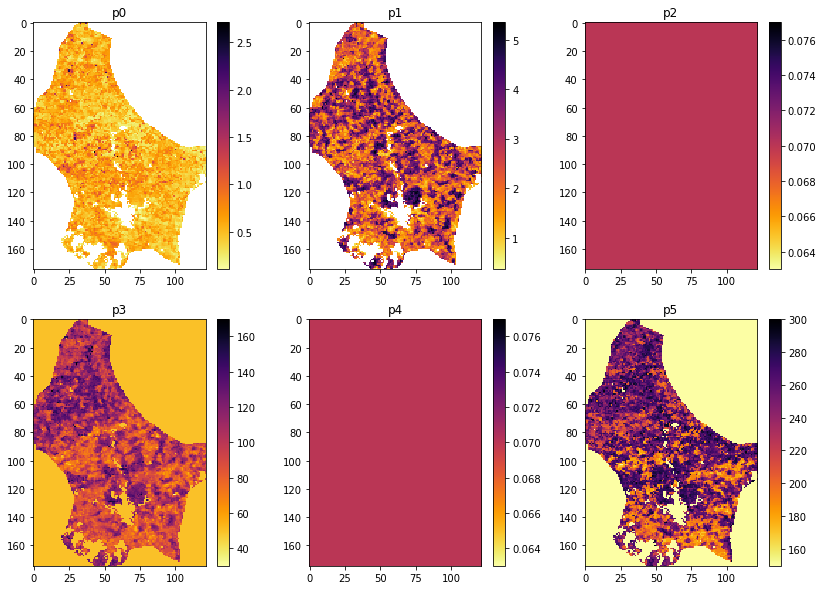

In [28]:
import matplotlib.pyplot as plt

# * Produce a plot of all 6 model parameters   

fig, axs = plt.subplots(2,3,figsize=(14,10))
axs = axs.flatten()
for i in range(axs.shape[0]):
    im = axs[i].imshow(p[i],interpolation="nearest",\
                    cmap=plt.cm.inferno_r)
    axs[i].set_title(f'p{i}')
    fig.colorbar(im, ax=axs[i])